In [1]:
import pandas as pd
import warnings
warnings.filterwarnings("ignore")
trans = pd.read_csv('transactions.csv', sep=';')
trans


,user_id,dt,type,value
0,39026145,0 10:23:26,"Звонки с использованием телефонов, считывающих...",2695.099
1,39026145,6 07:08:31,"Звонки с использованием телефонов, считывающих...",2358.212
2,39026145,8 07:06:10,"Звонки с использованием телефонов, считывающих...",2807.395
3,39026145,11 08:49:03,"Звонки с использованием телефонов, считывающих...",2695.099
4,39026145,11 14:12:08,"Звонки с использованием телефонов, считывающих...",2695.099
...,...,...,...,...
2282462,71902723,290 15:12:09,Агенты и менеджеры по аренде недвижимости,2133.620
2282463,71942984,248 00:00:00,Агенты и менеджеры по аренде недвижимости,1870.848
2282464,71942984,375 00:00:00,Агенты и менеджеры по аренде недвижимости,2466.016
2282465,74289663,27 00:00:00,Агентства по аренде автомобилей,1445.831


In [2]:
import pandas as pd
import warnings
warnings.filterwarnings("ignore")
gender = pd.read_csv('gender.csv', sep=',')
gender = gender.set_index('user_id')
gender

,gender
user_id,
6740969,1.0
36599781,0.0
91453656,1.0
17431962,1.0
72568668,1.0
...,...
93715144,1.0
51502229,0.0
77655748,1.0


In [3]:
together = trans.join(gender, on ='user_id')
together

,user_id,dt,type,value,gender
0,39026145,0 10:23:26,"Звонки с использованием телефонов, считывающих...",2695.099,1.0
1,39026145,6 07:08:31,"Звонки с использованием телефонов, считывающих...",2358.212,1.0
2,39026145,8 07:06:10,"Звонки с использованием телефонов, считывающих...",2807.395,1.0
3,39026145,11 08:49:03,"Звонки с использованием телефонов, считывающих...",2695.099,1.0
4,39026145,11 14:12:08,"Звонки с использованием телефонов, считывающих...",2695.099,1.0
...,...,...,...,...,...
2282462,71902723,290 15:12:09,Агенты и менеджеры по аренде недвижимости,2133.620,0.0
2282463,71942984,248 00:00:00,Агенты и менеджеры по аренде недвижимости,1870.848,0.0
2282464,71942984,375 00:00:00,Агенты и менеджеры по аренде недвижимости,2466.016,0.0
2282465,74289663,27 00:00:00,Агентства по аренде автомобилей,1445.831,1.0


In [4]:
together['type'].nunique()

184

In [5]:

agg_func= {'value': ['sum', "mean", "std"]}
agg_func

{'value': ['sum', 'mean', 'std']}

In [6]:
grouped = trans.groupby(['user_id']).agg(agg_func)
grouped

value                         
                  sum         mean         std
user_id                                       
22899      274383.315  2143.619648  656.186785
27914      166436.523  2521.765500  415.972053
28753      251578.185  1980.930591  749.304999
31385      717856.052  2323.158744  632.491585
38084     1360028.958  2095.576206  649.030870
...               ...          ...         ...
99953525   159252.786  1608.614000  709.903466
99967537    13026.313  2605.262600  123.013557
99988578  1304612.429  2185.280451  638.235664
99991245   249213.163  2026.123276  739.432221
99999680   512044.107  2015.921681  782.301092

[8356 rows x 3 columns]

In [7]:
merged=grouped.join(gender, on='user_id')
merged.columns= [ 'value_sum','value_mean', 'value_std', 'gender']
merged

,value_sum,value_mean,value_std,gender
user_id,,,,
22899,274383.315,2143.619648,656.186785,1.0
27914,166436.523,2521.765500,415.972053,1.0
28753,251578.185,1980.930591,749.304999,0.0
31385,717856.052,2323.158744,632.491585,0.0
38084,1360028.958,2095.576206,649.030870,0.0
...,...,...,...,...
99953525,159252.786,1608.614000,709.903466,0.0
99967537,13026.313,2605.262600,123.013557,1.0
99988578,1304612.429,2185.280451,638.235664,1.0


In [8]:
#merged=(merged[merged['value_std'].isnull()].fillna(0)) #поняла, что есть пропуски в колонке value_std, когда у юзера 
#была всего одна покупка, логично заменить на 0, так как отклонение стоимости одной покупки от суммы типаа нулевое))
merged = merged.fillna({'value_std':0})
merged

,value_sum,value_mean,value_std,gender
user_id,,,,
22899,274383.315,2143.619648,656.186785,1.0
27914,166436.523,2521.765500,415.972053,1.0
28753,251578.185,1980.930591,749.304999,0.0
31385,717856.052,2323.158744,632.491585,0.0
38084,1360028.958,2095.576206,649.030870,0.0
...,...,...,...,...
99953525,159252.786,1608.614000,709.903466,0.0
99967537,13026.313,2605.262600,123.013557,1.0
99988578,1304612.429,2185.280451,638.235664,1.0


In [9]:
(merged[merged['value_std'].isnull()].fillna(0)) #теперь пропусков нет

,value_sum,value_mean,value_std,gender
user_id,,,,


In [10]:
#отложенная выборка, копировала из семинара 6
from sklearn.model_selection import train_test_split 
df_train, df_test = train_test_split(merged, test_size = 0.2, random_state=17)
y_train = df_train['gender'].to_numpy() #целевые метки обущающей выборки
y_test = df_test['gender'].to_numpy() #целевые метки тестовой выборки

x_train = df_train.drop('gender', axis=1).to_numpy() #признаки обучающей выборки
x_test = df_test.drop('gender', axis=1).to_numpy() #признаки тестовой выборки

feature_names = df_train.drop('gender', axis=1).columns #названия признаков

In [11]:
#Обучение и оценка модели [5 баллов] жостко копируется ВСЁ из семинара 10, в том числе внизу код для отрисовки confusion matrix 
# полностью скопирован из семинара,а также поиск значений метрик
from sklearn.linear_model import LogisticRegression

model = LogisticRegression(C=0.1833)
model.fit(x_train, y_train);

p_pred = model.predict_proba(x_test)

In [12]:
p_pred

array([[0.53674734, 0.46325266],
       [0.56028133, 0.43971867],
       [0.57481455, 0.42518545],
       ...,
       [0.58048361, 0.41951639],
       [0.49976584, 0.50023416],
       [0.55190764, 0.44809236]])

In [13]:
p_pred = p_pred[:, -1]
p_pred

array([0.46325266, 0.43971867, 0.42518545, ..., 0.41951639, 0.50023416,
       0.44809236])

In [14]:
y_pred = model.predict(x_test)
y_pred

array([0., 0., 0., ..., 0., 1., 0.])

In [15]:
import numpy as np
np.alltrue((p_pred >= 0.5) == y_pred)


True

In [16]:
t = 0.5 #тоже самое
y_pred = 1*(p_pred >= t) 
y_pred

array([0, 0, 0, ..., 0, 1, 0])

In [17]:
from sklearn.metrics import confusion_matrix
confusion_matrix(y_test, y_pred)

array([[920,  10],
       [720,  22]], dtype=int64)

In [18]:
from sklearn.metrics import accuracy_score
accuracy_score(y_pred, y_test)

0.5633971291866029

In [19]:
import matplotlib.pyplot as plt
import itertools

def conf_matrix_pic(y_test, y_pred, cm_normalize=True):
    """
        Отрисовка confusion matrix
    """
    cm = confusion_matrix(y_test, y_pred)
    if cm_normalize:
        cm = np.round(100*cm.astype('float') / cm.sum(), 1)
    
    fig = plt.figure()
    ax = fig.add_subplot(111)
    ax.imshow(cm, interpolation='nearest', cmap=plt.cm.Blues)
    ax.set_title('Confusion matrix', size=16)
    
    classes = ['0', '1']
    tick_marks = np.arange(len(classes))
    
    fmt = '.2f' if cm_normalize else 'd'
    thresh = cm.max() / 2.
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        ax.text(i, j, format(cm[i, j], fmt),
                 horizontalalignment="center",
                 color="white" if cm[i, j] > thresh else "black", fontsize=30)

    ax.set_xlabel('True label', fontsize=16)
    ax.set_xticks(tick_marks)
    ax.set_xticklabels(classes)
    ax.set_xlim(-0.5, 1.5)

    ax.set_ylabel('Predicted label', fontsize=16)
    ax.set_yticks(tick_marks)
    ax.set_yticklabels(classes)
    ax.set_ylim(-0.5, 1.5)

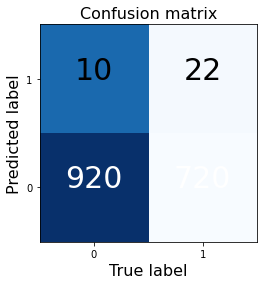

In [20]:
conf_matrix_pic(y_test, y_pred, cm_normalize=False)


In [21]:
from sklearn.metrics import precision_score, recall_score

precision_score(y_test, y_pred) #нашли, насколько точно алгоритм предсказывает единичку

0.6875

In [22]:
recall_score(y_test, y_pred) #показывает, как много объектов первого класса наш алгоритм находит, то есть метрика демонстрирует способность алгоритма обнаруживать данный класс вообще


0.029649595687331536

In [23]:
def false_positive_rate(y_test, y_pred):
    return ((y_test == 0) & (y_pred == 1)).sum()/(y_test == 0).sum()

false_positive_rate(y_test, y_pred) #FPR показывает, какую долю из объектов negative класса алгоритм предсказал неверно.



0.010752688172043012

In [24]:
 

print('Точность:', precision_score(y_test, y_pred))
print('Полнота:', recall_score(y_test, y_pred))
print('FPR:', false_positive_rate(y_test, y_pred))

Точность: 0.6875
Полнота: 0.029649595687331536
FPR: 0.010752688172043012


In [27]:
from sklearn.metrics import roc_auc_score
roc_auc_score(y_test, p_pred)
#значения метрик плохие, так как мало признаков, не подбирались гиперпараметры, X не отнормированы - надо все это проделать
#и резы будут получше

0.5744688867634699

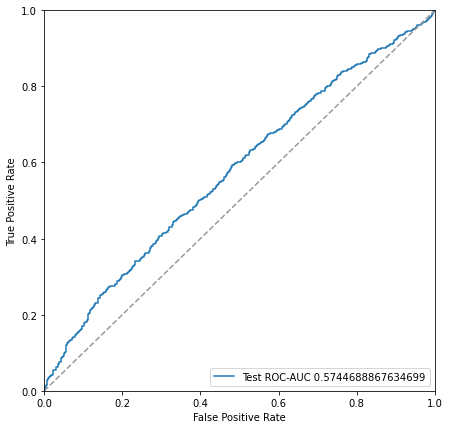

In [28]:

from sklearn.metrics import roc_curve

def roc_auc_pic(y_test, p_pred):    
    fpr_test, tpr_test, thresholds_test = roc_curve(y_test, p_pred)
    roc_auc_test = roc_auc_score(y_test, p_pred)

    plt.figure(figsize=(7, 7))
    plt.plot(fpr_test, tpr_test, label='Test ROC-AUC {0}'.format(roc_auc_test))
    plt.plot([0, 1], [0, 1], '--', color=(0.6, 0.6, 0.6))
    plt.xlim([0, 1])
    plt.ylim([0, 1])
    plt.xlabel('False Positive Rate')
    plt.ylabel('True Positive Rate')
    plt.legend(loc='lower right');
roc_auc_pic(y_test, p_pred)


In [33]:
#Часть 2: мб сделаем что-то более серьёзное? [макс 20 баллов]
#Подготовка данных [15 баллов]
pivot_table=together.pivot_table(index='user_id', columns='type',aggfunc='sum', values='value', fill_value=0)
pivot_table_merged = pivot_table.merge(gender, on = 'user_id')
pivot_table_merged

,"Авиалинии, авиакомпании","Авиалинии, авиакомпании, нигде более не классифицированные",Автобусные линии,Автозапчасти и аксессуары,Автоматизированные бензозаправки,Автомойки,Автошины,"Агентства по автотранспортным перевозкам, местные/дальные автогрузоперевозки, компании попереезду и хранению, местная доставка",Агентства по аренде автомобилей,Агенты и менеджеры по аренде недвижимости,...,"Химикалии и смежные вещества, не классифицированные ранее",Химчистки,Ценные бумаги: брокеры/дилеры,Центры здоровья,"Цифровые товары, игры",Школы — бизнес и секретарей,Штрафы,"Штучные товары, галантерея и другие текстильные товары",Электрические части и оборудование,gender
user_id,,,,,,,,,,,,,,,,,,,,,
22899,0.0,0.0,0.0,0.000,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.00,0.0,0.0,0.0,0.0,1.0
27914,0.0,0.0,0.0,0.000,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.00,0.0,0.0,0.0,0.0,1.0
28753,0.0,0.0,0.0,0.000,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.00,0.0,0.0,0.0,0.0,0.0
31385,0.0,0.0,0.0,0.000,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.00,0.0,0.0,0.0,0.0,0.0
38084,0.0,0.0,0.0,0.000,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.00,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
99953525,0.0,0.0,0.0,0.000,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.00,0.0,0.0,0.0,0.0,0.0
99967537,0.0,0.0,0.0,0.000,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.00,0.0,0.0,0.0,0.0,1.0
99988578,0.0,0.0,0.0,0.000,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,4267.24,0.0,0.0,0.0,0.0,1.0


In [41]:
from sklearn.model_selection import train_test_split 
df_train, df_test = train_test_split(pivot_table_merged, test_size = 0.2, random_state=17)
y_train = df_train['gender'].to_numpy() #целевые метки обущающей выборки
y_test = df_test['gender'].to_numpy() #целевые метки тестовой выборки

x_train = df_train.drop('gender', axis=1).to_numpy() #признаки обучающей выборки
x_test = df_test.drop('gender', axis=1).to_numpy() #признаки тестовой выборки

feature_names = df_train.drop('gender', axis=1).columns #названия признаков

In [42]:
from sklearn.linear_model import LogisticRegression
model = LogisticRegression()
model.fit(x_train, y_train);

p_pred = model.predict_proba(x_test)

In [43]:
p_pred

array([[0.94559144, 0.05440856],
       [0.79963215, 0.20036785],
       [0.80362563, 0.19637437],
       ...,
       [0.51786203, 0.48213797],
       [0.9735376 , 0.0264624 ],
       [0.21507534, 0.78492466]])

In [44]:
p_pred = p_pred[:, -1]
p_pred

array([0.05440856, 0.20036785, 0.19637437, ..., 0.48213797, 0.0264624 ,
       0.78492466])

In [45]:
y_pred = model.predict(x_test)
y_pred

array([0., 0., 0., ..., 0., 0., 1.])

In [46]:
import numpy as np
np.alltrue((p_pred >= 0.5) == y_pred)

True

In [47]:
t = 0.5
y_pred = 1*(p_pred >= t) 
y_pred

array([0, 0, 0, ..., 0, 0, 1])

In [48]:
from sklearn.metrics import confusion_matrix
confusion_matrix(y_test, y_pred)

array([[752, 178],
       [251, 491]], dtype=int64)

In [49]:
from sklearn.metrics import accuracy_score
accuracy_score(y_pred, y_test)

0.743421052631579

In [50]:
from sklearn.metrics import precision_score, recall_score

precision_score(y_test, y_pred) #нашли, насколько точно алгоритм предсказывает единичку

0.7339312406576981

In [51]:
recall_score(y_test, y_pred) #показывает, как много объектов первого класса наш алгоритм находит, то есть метрика демонстрирует способность алгоритма обнаруживать данный класс вообще


0.6617250673854448

In [52]:
def false_positive_rate(y_test, y_pred):
    return ((y_test == 0) & (y_pred == 1)).sum()/(y_test == 0).sum()

false_positive_rate(y_test, y_pred) #FPR показывает, какую долю из объектов negative класса алгоритм предсказал неверно.



0.1913978494623656

In [53]:
t = 0.5
y_pred = 1*(p_pred >= t) 

print('Точность:', precision_score(y_test, y_pred))
print('Полнота:', recall_score(y_test, y_pred))
print('FPR:', false_positive_rate(y_test, y_pred))

Точность: 0.7339312406576981
Полнота: 0.6617250673854448
FPR: 0.1913978494623656


In [56]:
from sklearn.metrics import roc_auc_score
roc_auc_score(y_test, p_pred)
#качество модели улучшилось, так как появилось намноого больше признаков (а не 3, как было изначально)

0.8170419963481437

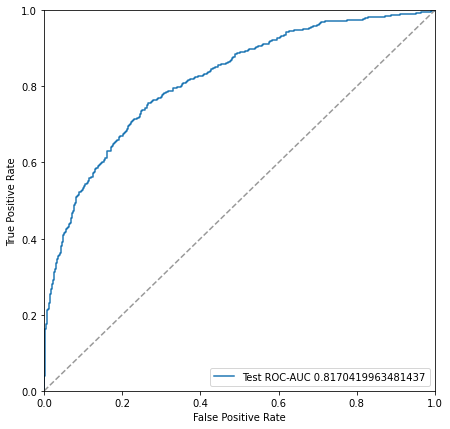

In [57]:

from sklearn.metrics import roc_curve

def roc_auc_pic(y_test, p_pred):    
    fpr_test, tpr_test, thresholds_test = roc_curve(y_test, p_pred)
    roc_auc_test = roc_auc_score(y_test, p_pred)

    plt.figure(figsize=(7, 7))
    plt.plot(fpr_test, tpr_test, label='Test ROC-AUC {0}'.format(roc_auc_test))
    plt.plot([0, 1], [0, 1], '--', color=(0.6, 0.6, 0.6))
    plt.xlim([0, 1])
    plt.ylim([0, 1])
    plt.xlabel('False Positive Rate')
    plt.ylabel('True Positive Rate')
    plt.legend(loc='lower right');
roc_auc_pic(y_test, p_pred)

In [58]:
from sklearn import preprocessing
gender_column=pivot_table_merged.iloc[:,-1].to_frame()


In [59]:
user_id=gender_column.index.values
user_id

array([   22899,    27914,    28753, ..., 99988578, 99991245, 99999680],
      dtype=int64)

In [60]:
pivot_table_merged = pivot_table_merged.drop(columns='gender', axis=1) #удаляю столбец с гендерами, чтоб он тоже не нормировался

pivot_table_merged

,"Авиалинии, авиакомпании","Авиалинии, авиакомпании, нигде более не классифицированные",Автобусные линии,Автозапчасти и аксессуары,Автоматизированные бензозаправки,Автомойки,Автошины,"Агентства по автотранспортным перевозкам, местные/дальные автогрузоперевозки, компании попереезду и хранению, местная доставка",Агентства по аренде автомобилей,Агенты и менеджеры по аренде недвижимости,...,"Фотостудии, фотолаборатории","Химикалии и смежные вещества, не классифицированные ранее",Химчистки,Ценные бумаги: брокеры/дилеры,Центры здоровья,"Цифровые товары, игры",Школы — бизнес и секретарей,Штрафы,"Штучные товары, галантерея и другие текстильные товары",Электрические части и оборудование
user_id,,,,,,,,,,,,,,,,,,,,,
22899,0.0,0.0,0.0,0.000,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.00,0.0,0.0,0.0,0.0
27914,0.0,0.0,0.0,0.000,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.00,0.0,0.0,0.0,0.0
28753,0.0,0.0,0.0,0.000,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.00,0.0,0.0,0.0,0.0
31385,0.0,0.0,0.0,0.000,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.00,0.0,0.0,0.0,0.0
38084,0.0,0.0,0.0,0.000,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.00,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
99953525,0.0,0.0,0.0,0.000,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.00,0.0,0.0,0.0,0.0
99967537,0.0,0.0,0.0,0.000,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.00,0.0,0.0,0.0,0.0
99988578,0.0,0.0,0.0,0.000,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,4267.24,0.0,0.0,0.0,0.0


In [61]:
names_m = pivot_table_merged.columns.tolist()
d1 = preprocessing.normalize(pivot_table_merged)
scaled_df1 = pd.DataFrame(d1, columns = names_m)
scaled_df1 

,"Авиалинии, авиакомпании","Авиалинии, авиакомпании, нигде более не классифицированные",Автобусные линии,Автозапчасти и аксессуары,Автоматизированные бензозаправки,Автомойки,Автошины,"Агентства по автотранспортным перевозкам, местные/дальные автогрузоперевозки, компании попереезду и хранению, местная доставка",Агентства по аренде автомобилей,Агенты и менеджеры по аренде недвижимости,...,"Фотостудии, фотолаборатории","Химикалии и смежные вещества, не классифицированные ранее",Химчистки,Ценные бумаги: брокеры/дилеры,Центры здоровья,"Цифровые товары, игры",Школы — бизнес и секретарей,Штрафы,"Штучные товары, галантерея и другие текстильные товары",Электрические части и оборудование
0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0
1,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0
2,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0
3,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0
4,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8351,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0
8352,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0
8353,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.007787,0.0,0.0,0.0,0.0
8354,0.0,0.0,0.0,0.037518,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0


In [62]:
scaled_df1 = scaled_df1.set_index(user_id) #возвращаю на место айдишки
scaled_df1

,"Авиалинии, авиакомпании","Авиалинии, авиакомпании, нигде более не классифицированные",Автобусные линии,Автозапчасти и аксессуары,Автоматизированные бензозаправки,Автомойки,Автошины,"Агентства по автотранспортным перевозкам, местные/дальные автогрузоперевозки, компании попереезду и хранению, местная доставка",Агентства по аренде автомобилей,Агенты и менеджеры по аренде недвижимости,...,"Фотостудии, фотолаборатории","Химикалии и смежные вещества, не классифицированные ранее",Химчистки,Ценные бумаги: брокеры/дилеры,Центры здоровья,"Цифровые товары, игры",Школы — бизнес и секретарей,Штрафы,"Штучные товары, галантерея и другие текстильные товары",Электрические части и оборудование
22899,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0
27914,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0
28753,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0
31385,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0
38084,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
99953525,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0
99967537,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0
99988578,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.007787,0.0,0.0,0.0,0.0
99991245,0.0,0.0,0.0,0.037518,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0


In [64]:
res = pd.concat([scaled_df1, gender_column], axis=1) #к отнормированной табличке возвращаю гендеры
res

,"Авиалинии, авиакомпании","Авиалинии, авиакомпании, нигде более не классифицированные",Автобусные линии,Автозапчасти и аксессуары,Автоматизированные бензозаправки,Автомойки,Автошины,"Агентства по автотранспортным перевозкам, местные/дальные автогрузоперевозки, компании попереезду и хранению, местная доставка",Агентства по аренде автомобилей,Агенты и менеджеры по аренде недвижимости,...,"Химикалии и смежные вещества, не классифицированные ранее",Химчистки,Ценные бумаги: брокеры/дилеры,Центры здоровья,"Цифровые товары, игры",Школы — бизнес и секретарей,Штрафы,"Штучные товары, галантерея и другие текстильные товары",Электрические части и оборудование,gender
22899,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,1.0
27914,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,1.0
28753,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0
31385,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0
38084,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
99953525,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0
99967537,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,1.0
99988578,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.007787,0.0,0.0,0.0,0.0,1.0
99991245,0.0,0.0,0.0,0.037518,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,1.0


In [106]:
X_cros_val=res.drop('gender', axis=1).to_numpy() 
y_cros_val= res['gender'].to_numpy()

In [65]:
from sklearn.model_selection import train_test_split 
df_train, df_test = train_test_split(res, test_size = 0.2, random_state=17)
y_train_res = df_train['gender'].to_numpy() #целевые метки обущающей выборки
y_test_res = df_test['gender'].to_numpy() #целевые метки тестовой выборки

x_train_res = df_train.drop('gender', axis=1).to_numpy() #признаки обучающей выборки
x_test_res = df_test.drop('gender', axis=1).to_numpy() #признаки тестовой выборки

feature_names = df_train.drop('gender', axis=1).columns #названия признаков

In [67]:
#работает миллион лет
from sklearn.model_selection import GridSearchCV 
parameters = ['newton-cg', 'lbfgs', 'liblinear', 'sag', 'saga'] #в цикле буду прогонять каждый из солверов и выбирать лучший по С и штрафу
param_grid = {'C': np.logspace(-4, 4, 10), 'penalty': ['l1', 'l2']} #решила гридсерчить, изменяя только это, иначе все это будет прогружаться несколько часов)))
dic = {}

for i in range(len(parameters)):
    model = LogisticRegression(random_state=17,solver =parameters[i])

    grid_clf = GridSearchCV(model, param_grid,cv=4,scoring='roc_auc')
    grid_clf.fit(x_train_res, y_train_res)
    dic[parameters[i]] = grid_clf.best_params_, grid_clf.best_score_
dic #лучший solver 'liblinear'  с лучшими параметрами {'C': 21.54434690031882, 'penalty': 'l1'}, метрика рок-аук равна 0.8003255808225687


{'newton-cg': ({'C': 166.81005372000558, 'penalty': 'l2'}, 0.8001176785062328),
 'lbfgs': ({'C': 1291.5496650148827, 'penalty': 'l2'}, 0.7989571924059875),
 'liblinear': ({'C': 21.54434690031882, 'penalty': 'l1'}, 0.8003255808225687),
 'sag': ({'C': 166.81005372000558, 'penalty': 'l2'}, 0.8000847183829112),
 'saga': ({'C': 1291.5496650148827, 'penalty': 'l1'}, 0.8002669045590732)}

In [72]:
#теперь выбрав лучшие гиперпараметры обучу модель
from sklearn.metrics import roc_auc_score
model = LogisticRegression(random_state=17,solver ='liblinear', C = 21.54434690031882, penalty= 'l1')

model.fit(x_train_res, y_train_res)
coefficients = model.coef_
y_pred = model.predict(x_test_res)
p_pred_test = model.predict_proba(x_test_res)
p_pred_test = p_pred_test[:, -1]
print('roc_auc_test =', roc_auc_score(y_test_res, p_pred_test))
print('accuracy_test =', accuracy_score(y_test_res, y_pred))
print('precision_test =', precision_score(y_test_res, y_pred))
print('recall_test =', recall_score(y_test_res, y_pred))
#рок_аук и пресишн стали получше по сравнению с прошлым пунктом, так как гридсерч позволяет подобрать наилучшие гиперпараметры для конкретной модели
#а не использовать дефолтные гиперпараметры, которые могут в конкретном случае не так хорошо сработать
#я правильно поняла, что рок_аук не совпадает с тем, что я получила в прошлой ячейке 
# потому что типа при кросс-валидации рок_аук усредняется по 4 разным обучающим выборкам?

roc_auc_test = 0.8236457699330493
accuracy_test = 0.7482057416267942
precision_test = 0.7715736040609137
recall_test = 0.6145552560646901


In [76]:
#кросс-валидация нужна для подбора гиперпараметров, так как это делает надежнее модель, при этом мы используем отложенные тренировочные и тестовые выборки, чтобы
#при обучении модель не получала тестовые значения вообще и затем при оценивании теста не выбивала стопроцентные значения метрик


In [77]:
#перескочила на один подпункт вперед
ff=coefficients[0][:] #получила значения коэффициентов для каждого признака по модельке из прошлой ячейки
ff== np.set_printoptions(suppress=True)
ff

array([  0.        ,  -0.81743929, -18.37527249,  18.54357122,
         2.17074542,  11.42012144,   2.90908339,   0.        ,
         0.        ,   0.        , -53.82596794,  -4.08634136,
        -2.35038155,   0.21988371,   4.58170577,   6.40671514,
         0.21201333,   0.        ,   0.        ,   0.        ,
        -6.38388894,   5.83671412,   0.        ,   0.        ,
        10.11008283,   0.        ,  10.46649872,  25.13825401,
         2.61040294, -64.95710432, -12.4296422 ,  -0.57005489,
         3.95490255,  -2.61923067,   1.24699954,   4.768009  ,
         1.57477054,   0.        ,   0.        ,  -0.38954703,
        -4.12837792,   0.        ,   0.        ,   0.        ,
         0.        ,   8.00346834, -28.38430964,  13.25578894,
         3.06021457,   0.        ,  -1.32860024,   0.        ,
        -1.41713097,   3.00405096,  67.33516206,  -2.95149796,
         0.        ,   5.04270949, -12.59776049,   9.1284343 ,
         0.36165466,   0.        ,  -4.18683761,   0.13

In [78]:
import numpy as np
import pandas
class_1, class_0=[], []
for i in range(len(ff)):
    if ff[i]>0: #если коэф положительный, вероятность получения класса 1 > 0.5
        class_1.append(feature_names[i])
    elif ff[i]<0: #если коэф отрицательный, вероятность получения класса 1 < 0.5 (или P(класса0) > 0.5)
        class_0.append(feature_names[i])
print('Количество признаков, которые увеличивают вероятность метки 1 -', len(class_1))
print('Количество признаков, которые увеличивают вероятность метки 0 -',len(class_0))
print('class_1: ', *class_1[:10], '...')
print('class_0: ', *class_0[:10], '...')
#если коэф отрицательный, P(class1) == 0.5

Количество признаков, которые увеличивают вероятность метки 1 - 78
Количество признаков, которые увеличивают вероятность метки 0 - 45
class_1:  Автозапчасти и аксессуары Автоматизированные бензозаправки Автомойки Автошины Бакалейные магазины, супермаркеты Бары, коктейль-бары, дискотеки, ночные клубы и таверны — места продажи алкогольных напитков Беспошлинные магазины Duty Free Бизнес-сервис Бытовое оборудование Видеопрокат ...
class_0:  Авиалинии, авиакомпании, нигде более не классифицированные Автобусные линии Аксессуары для женщин Аптеки Ассоциации — гражданские, социальные и братские Булочные Готовая женская одежда Дантисты, ортодонтисты Денежные переводы Детская одежда, включая одежду для самых маленьких ...


In [79]:
#Подбор отсечения [5 баллов]

from sklearn.metrics import fbeta_score
prec_list=[]
rec_list=[]
t = np.linspace(0.01,1,50) 
fbeta=[]

for i in range(len(t)):
    y_pred = 1*(p_pred_test >=t[i]) 
    prec = precision_score(y_test, y_pred)
    rec = recall_score(y_test, y_pred)
    prec_list.append(prec)
    rec_list.append(rec)
    fbeta.append(fbeta_score(y_test_res, y_pred, beta=5))
    

print(max(fbeta))       
ind = fbeta.index(max(fbeta))
ans=t[ind] #порог t, который соответствует максимальной F-бете - всегда будет соответствовать минимально возможному t, 
ans        #в том числе и нулю, если я возьму такой интервал,который его включает, при инициализации t

0.9522723893542151


0.01

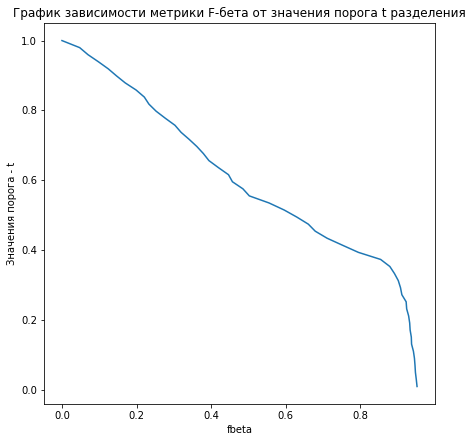

In [80]:
import matplotlib.pyplot as plt
plt.figure(figsize=(7, 7))

plt.plot(fbeta,t)
plt.xlabel("fbeta")
plt.ylabel("Значения порога - t")
plt.title('График зависимости метрики F-бета от значения порога t разделения');

In [ ]:
#часть 4

In [100]:
from sklearn.ensemble import RandomForestClassifier

model_rf = RandomForestClassifier(random_state=17) #метрика без кросс-валидации для случайного леса

model_rf.fit(x_train_res, y_train_res)

p_pred = model_rf.predict_proba(x_test_res)
roc_auc_score(y_test_res, p_pred[:,-1]) #даже без подбора гиперпараметров, значение метрики улучшилось

0.8251731733472453

In [91]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.experimental import enable_halving_search_cv  
from sklearn.model_selection import HalvingGridSearchCV
clf = RandomForestClassifier(random_state=17)

param_grid = {"max_depth": [3, 10], "min_samples_split": [5, 100], 'criterion': ['gini', 'entropy']}
search = HalvingGridSearchCV(clf, param_grid, resource='n_estimators',max_resources=10,random_state=17).fit(x_train_res, y_train_res)
search.best_params_

{'criterion': 'gini',
 'max_depth': 10,
 'min_samples_split': 100,
 'n_estimators': 9}

In [92]:
halving_pred = search.predict_proba(x_test_res)
roc_auc_score(y_test_res, halving_pred[:,-1]) 
#Используемая модель - случайный лес с ускорением поиска по сетке
#пока что наилучшее значение рок_аука, если сравнивать со значением метрики из предыдущих частей


0.83260296206127

In [93]:
# по факту то же самое, что и в предыдущих ячейках
#https://habr.com/ru/articles/721154/
# from sklearn.ensemble import RandomForestClassifier
# from sklearn.experimental import enable_halving_search_cv  
# from sklearn.model_selection import HalvingGridSearchCV
# base_estimator=RandomForestClassifier(random_state=17)
# param_grid = [{

#     'randomforestclassifier__n_estimators': np.logspace(1, 3, num=10, endpoint=True, base=10.0, dtype=int).tolist(),

#     'randomforestclassifier__max_depth': [2, 3, 4, 5],

#     'randomforestclassifier__learning_rate': np.logspace(-1, 0, num=5, endpoint=True, base=10.0).tolist(),

#     'randomforestclassifier__reg_alpha': np.logspace(-4, 0, num=5, endpoint=True, base=10.0).tolist(),

#     'randomforestclassifier__reg_lambda': np.logspace(-4, 0, num=5, endpoint=True, base=10.0).tolist()

# }]
# halving_search = HalvingGridSearchCV(base_estimator, param_grid, cv=4, verbose=1, scoring='roc_auc', random_state=17 )
# X=x_train_res
# y = y_train_res
# search.best_params_
# #я пыталась сразу здесь обучить halving_search через fit, но с этим были проблемы, и я не поняла почему
# #поэтому лучшие критерии запихнула в модель в ячейку снизу

{'criterion': 'gini',
 'max_depth': 10,
 'min_samples_split': 100,
 'n_estimators': 9}

In [98]:
# base_estimator1=RandomForestClassifier(criterion= 'gini', max_depth= 10, min_samples_split=100, n_estimators=9, random_state=17)
# base_estimator1.fit(X, y)
# halving_search_pred = base_estimator1 .predict_proba(x_test_res)
# roc_auc_score(y_test_res,halving_search_pred [:,-1])

0.83260296206127

In [99]:
from sklearn.naive_bayes import GaussianNB

from sklearn.naive_bayes import BernoulliNB
gnb = GaussianNB()

nb_cv = BernoulliNB().fit(x_train_res, y_train_res)
gnb_cv=GaussianNB().fit(x_train_res, y_train_res)
gnb_y_pred=gnb_cv.predict_proba(x_test_res)
nb_y_pred=nb_cv.predict_proba(x_test_res)
print('bernoulli - ',roc_auc_score(y_test_res, nb_y_pred[:,-1]))
print('gaussian - ', roc_auc_score(y_test_res, gnb_y_pred[:,-1]))
#понимаю недостатки наивного байеса, но пусть будет)) вроде неплохо
#насколько я поняла, значение метрики хорошее, так как не возникает проблема нулевой частоты

bernoulli -  0.8340919630177086
gaussian -  0.7134611483059443


In [111]:
#еще раз средние значения метрики рок_аука в разных моделях с кросс_валидацией, но мне кажется, здесь он отложенную выборку по-другому составляет, если я правильно поняла, как крос-вал-скор работает
# https://www.helenkapatsa.ru/loghistichieskaia-rieghriessiia/
from sklearn.model_selection import GridSearchCV
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import cross_val_score

from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.naive_bayes import BernoulliNB
logreg_cv = LogisticRegression(random_state = 17)
dt_cv = DecisionTreeClassifier(random_state = 17)
knn_cv = KNeighborsClassifier()
svc_cv = SVC(random_state = 17)
nb_cv = BernoulliNB()

cv_dict = {0: 'Логистическая регрессия', 1: 'Дерево решений', 
           2: 'Метод k ближайших соседей', 3: 'Метод опорных векторов', 4: 'Наивный байесовский классификатор'}
cv_models = [logreg_cv, dt_cv, knn_cv, svc_cv, nb_cv]
for i,model in enumerate(cv_models):
    print("{} | Тестовая точность измерений: {}".format(cv_dict[i],cross_val_score(model, X_cros_val, y_cros_val, cv = 4, scoring = 'roc_auc').mean()))

Логистическая регрессия | Тестовая точность измерений: 0.7697588176552171
Дерево решений | Тестовая точность измерений: 0.6561177479244604
Метод k ближайших соседей | Тестовая точность измерений: 0.620745337130187
Метод опорных векторов | Тестовая точность измерений: 0.7632856362065947
Наивный байесовский классификатор | Тестовая точность измерений: 0.8250379459432957


In [112]:
# https://habr.com/ru/companies/ruvds/articles/488342/
from sklearn.model_selection import RandomizedSearchCV
n_estimators = [int(x) for x in np.linspace(start = 100, stop = 1000, num = 10)]
max_features = ['log2', 'sqrt']
max_depth = [int(x) for x in np.linspace(start = 1, stop = 15, num = 15)]
min_samples_split = [int(x) for x in np.linspace(start = 2, stop = 50, num = 10)]
min_samples_leaf = [int(x) for x in np.linspace(start = 2, stop = 50, num = 10)]
bootstrap = [True, False]
model_rf = RandomForestClassifier(random_state=17)

param_dist = {'n_estimators': n_estimators,
               'max_features': max_features,
               'max_depth': max_depth,
               'min_samples_split': min_samples_split,
               'min_samples_leaf': min_samples_leaf,
               'bootstrap': bootstrap}
rs = RandomizedSearchCV(model_rf, 
                        param_dist, 
                        n_iter = 10, 
                        cv = 4, 
                        verbose = 1, 
                        n_jobs=-1, 
                        random_state=17)
rs.fit(x_train_res, y_train_res)
rs.best_params_

Fitting 4 folds for each of 10 candidates, totalling 40 fits


{'n_estimators': 400,
 'min_samples_split': 7,
 'min_samples_leaf': 12,
 'max_features': 'sqrt',
 'max_depth': 13,
 'bootstrap': False}

In [114]:
py_pred = rs.predict_proba(x_test_res)
roc_auc_score(y_test_res, py_pred[:,-1]) 
# рандомный серч выдал лучше значение рок_аука, чем во всем том, что мы до этого делали)))

0.8567240529809003

In [131]:
from sklearn import svm #пока просто смотрю, что показывает рок-аук с помощью метода опорных векторов
linear_svc_model=svm.LinearSVC(random_state=17)
linear_svc_model.fit(x_train_res, y_train_res)
y_svc_predicted = linear_svc_model.predict(x_test_res)
roc_auc_score(y_svc_predicted, y_test_res)


0.7446188038793102

In [123]:
from sklearn.metrics import accuracy_score
predictions_poly = linear_svc_model.predict(x_test_res)
accuracy_poly = accuracy_score(y_test_res, predictions_poly)
accuracy_poly

0.7296650717703349

In [118]:
#https://python-school.ru/blog/svm_classifier/
C = 54.0  # параметр регуляризации - просто рандомно, не представляю, сколько бы времени оно работало, если бы по каждой модели я запускала перебор по сетке
linear_svc = svm.SVC(random_state=17,kernel='linear', C=C).fit(x_train_res, y_train_res)
# Создаем экземпляр SVM и обучаем модель с использованием RBF-ядро
rbf_svc = svm.SVC(random_state=17,kernel='rbf', gamma=0.7, C=C).fit(x_train_res, y_train_res)
# Создаем экземпляр SVM и обучаем модель с использованием полиномиального ядра
poly_svc = svm.SVC(random_state=17,kernel='poly', degree=2, C=C).fit(x_train_res, y_train_res)
# Создаем экземпляр SVM и обучаем модель с использованием сигмоидного ядра
sig_svc = svm.SVC(random_state=17,kernel='sigmoid', C=C).fit(x_train_res, y_train_res)
# оцениваем качество моделей
print('Accuracy of linear kernel:', accuracy_score(y_test_res, linear_svc.predict(x_test_res)))
print('Accuracy of polynomial kernel:', accuracy_score(y_test_res, poly_svc.predict(x_test_res)))
print('Accuracy of RBF kernel:', accuracy_score(y_test_res, rbf_svc.predict(x_test_res)))
print('Accuracy of sigmoid kernel:', accuracy_score(y_test_res, sig_svc.predict(x_test_res)))
print('\n')
print('roc_auc of linear kernel:', roc_auc_score(y_test_res, linear_svc.predict(x_test_res)))
print('roc_auc of polynomial kernel:', roc_auc_score(y_test_res, poly_svc.predict(x_test_res)))
print('roc_auc of RBF kernel:', roc_auc_score(y_test_res, rbf_svc.predict(x_test_res)))
print('roc_auc of sigmoid kernel:', roc_auc_score(y_test_res, sig_svc.predict(x_test_res)))

Accuracy of linear kernel: 0.7344497607655502
Accuracy of polynomial kernel: 0.7248803827751196
Accuracy of RBF kernel: 0.7272727272727273
Accuracy of sigmoid kernel: 0.5131578947368421


roc_auc of linear kernel: 0.7103440280555313
roc_auc of polynomial kernel: 0.7047387183723155
roc_auc of RBF kernel: 0.7100223168999796
roc_auc of sigmoid kernel: 0.5095122163290149


In [119]:
from sklearn.model_selection import RandomizedSearchCV
from sklearn.svm import NuSVC

nu = [float(x) for x in np.linspace(start = 0.1 , stop = 1, num = 10)]
kernel = ['linear', 'poly', 'rbf', 'sigmoid']
max_features = ['log2', 'sqrt']
degree = [int(x) for x in np.linspace(start = 1, stop = 15, num = 15)]
min_samples_split = [int(x) for x in np.linspace(start = 2, stop = 50, num = 10)]
min_samples_leaf = [int(x) for x in np.linspace(start = 2, stop = 50, num = 10)]
shrinking = [True, False]
model_rf = NuSVC()

param_dist = {"nu":nu, 'kernel':kernel, 'degree':degree,  'shrinking':shrinking, 'probability':shrinking}
rs_random = RandomizedSearchCV(model_rf, 
                        param_dist, 
                        n_iter = 10, 
                        cv = 4, 
                        verbose = 1, 
                        n_jobs=-1, 
                        random_state=17)
rs_random.fit(x_train_res, y_train_res)
rs_random.best_params_

Fitting 4 folds for each of 10 candidates, totalling 40 fits


{'shrinking': False,
 'probability': False,
 'nu': 0.4,
 'kernel': 'rbf',
 'degree': 7}

In [120]:
y_rs_predicted = rs_random.predict(x_test_res)
roc_auc_score(y_rs_predicted, y_test_res)

0.7096317020873676

In [ ]:
#оно пыталось прогрузиться минут 30, но ему слишком тяжело, я пыталась лучшие параметры для NuSVC найти нерандомно(
# from sklearn.svm import NuSVC
# from sklearn.model_selection import GridSearchCV 

# nu = [float(x) for x in np.linspace(start = 0.1 , stop = 1, num = 10)]
# kernel = ['linear', 'poly', 'rbf', 'sigmoid']

# shrinking = [True, False]
# model_rf = NuSVC( random_state=17)

# param_dist = {"nu":nu, 'kernel':kernel, 'degree':degree,  'shrinking':shrinking, 'probability':shrinking}
# rs =GridSearchCV (model_rf, param_dist, cv = 4, scoring ='roc_auc')
# rs.fit(x_train_res, y_train_res)
# rs.best_params_

In [161]:
from sklearn import svm
from sklearn.metrics import roc_auc_score

svc_model=svm.SVC(random_state=17, kernel='linear', C=1)
svc_model.fit(x_train_res, y_train_res)
y_svc_predicted_1 = svc_model.predict(x_test_res)
roc_auc_score(y_svc_predicted_1, y_test_res)

0.7420332096802686

In [121]:
from sklearn import svm
from sklearn.metrics import roc_auc_score

Nusvc_model=svm.NuSVC(random_state=17, kernel='poly', degree=2)
Nusvc_model.fit(x_train_res, y_train_res)
y_Nusvc_predicted = Nusvc_model.predict(x_test_res)
roc_auc_score(y_Nusvc_predicted, y_test_res)

0.7306110985740101

In [124]:
rfc = RandomForestClassifier(random_state=17)
param_grid = { 
    'n_estimators': [100, 120],
    'max_features': ['auto', 'sqrt', 'log2'],
    'max_depth' : [7, 8],
    'criterion' :['gini', 'entropy']
}

CV_rfc = GridSearchCV(estimator=rfc, param_grid=param_grid, cv= 4, scoring='roc_auc')
CV_rfc.fit(x_train_res, y_train_res)
CV_rfc.best_params_


{'criterion': 'gini',
 'max_depth': 7,
 'max_features': 'log2',
 'n_estimators': 100}

In [126]:
pred1 = CV_rfc.predict(x_test_res)
print("Accuracy for Random Forest on CV data: ",accuracy_score(y_test_res,pred1))
print("roc_auc for Random Forest on CV data: ", roc_auc_score(y_test_res,pred1))


Accuracy for Random Forest on CV data:  0.7529904306220095
roc_auc for Random Forest on CV data:  0.729735095498942


In [344]:
### очень долго работает нормальный гридсерч
n_estimators = [int(x) for x in np.linspace(start = 10, stop = 100, num = 10)]
max_features = ['log2', 'sqrt']
max_depth = [int(x) for x in np.linspace(start = 1, stop = 15, num = 15)]
min_samples_split = [int(x) for x in np.linspace(start = 2, stop = 50, num = 10)]
min_samples_leaf = [int(x) for x in np.linspace(start = 2, stop = 50, num = 10)]
bootstrap = [True, False]
model_rf = RandomForestClassifier(random_state=17)

param_dist = {'n_estimators': n_estimators,
               'max_features': max_features,
               'max_depth': max_depth,
               'min_samples_split': min_samples_split,
               'min_samples_leaf': min_samples_leaf,
               'bootstrap': bootstrap}
rs=GridSearchCV(estimator=model_rf , param_grid=param_dist, cv= 4, scoring='roc_auc')

rs.fit(x_train_res, y_train_res)
p_pred = rs.predict_proba(x_test_res)
roc_auc_score(y_test_res, p_pred[:,-1])

KeyboardInterrupt: 

In [133]:
#я немного запуталась, что я вообще делаю к концу, гридсерч нормально сделать не получилось(
#лучшее значение рок-аука в итоге получилось тогда, когда использовали рандомную кросс-валидацию и случайный лес
#на втором месте случайный лес с ускоренной кросс-валидацией
#значение метрики с использованием случайного леса без кросс-валидации и наивного байесовского метода тоже получилось хорошее
